In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning for visualization
import warnings
warnings.filterwarnings("ignore") 
plt.rcParams['figure.dpi'] = 200 # set the standard resolution for each plot

- ### Reading .CSV file from Github
By adding `?raw=true` at the end of your "url"

In [228]:
df = pd.read_csv('https://github.com/tuananh0622/Notebook/blob/main/netflix_titles.csv?raw=true')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


- ### Missing data
Making some sentences indicate the percentage of null values in each column of the dataset

In [229]:
for i in df.columns:     # Loop through each column in the `df` dataset
    null_rate = df[i].isna().sum() / len(df) * 100 
    # Set the variable `null_rate` = number of null values in column i / the total values * 100
    if null_rate > 0: # Only accept the columns have null values
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [230]:
print('There are {} missing values or NaNs in df'.format(df.isna().values.sum()))
print('There are {} duplicate rows in df'.format(df.duplicated().sum()))

There are 4307 missing values or NaNs in df
There are 0 duplicate rows in df


- ### Replacing data
Replacing NaNs or missing data by "No Data"\
Replacing NaNs or missing data by the `mode` of the column

In [231]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
# replace NaNs by "No Data"
df['cast'].replace(np.nan, 'No Data', inplace=True)

- ### Convert time to datetime
Change the `object` type to `datetime` type

In [232]:
# You can add `utc=True` to provide time like: 2021-09-25 00:00:00+00:00
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)
# Create a new month column
df['month_added'] = df['date_added'].dt.month
# Create a new month name (September, October...) column
df['month_name_added'] = df['date_added'].dt.month_name()
# Create a new year column
df['year_added'] = df['date_added'].dt.year

- ### Color Palette
Create a range of colour using for visualization

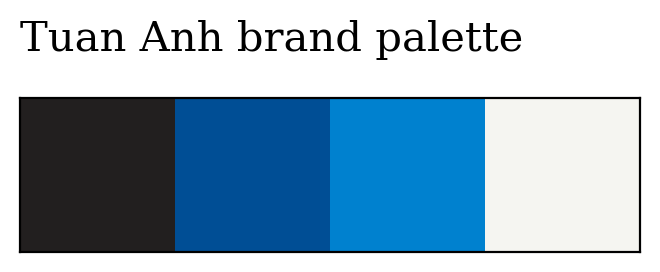

In [233]:
sns.palplot(['#221f1f', '#004E95', '#0081CF','#f5f5f1'])

plt.title("Tuan Anh brand palette",loc='left',fontfamily='serif',fontsize=15, y=1.2)
plt.tick_params(bottom = False) # remove x-tick
plt.show()

- ### Timeline visualization
It's so cool to illustrate the period of time of an `Object` in life

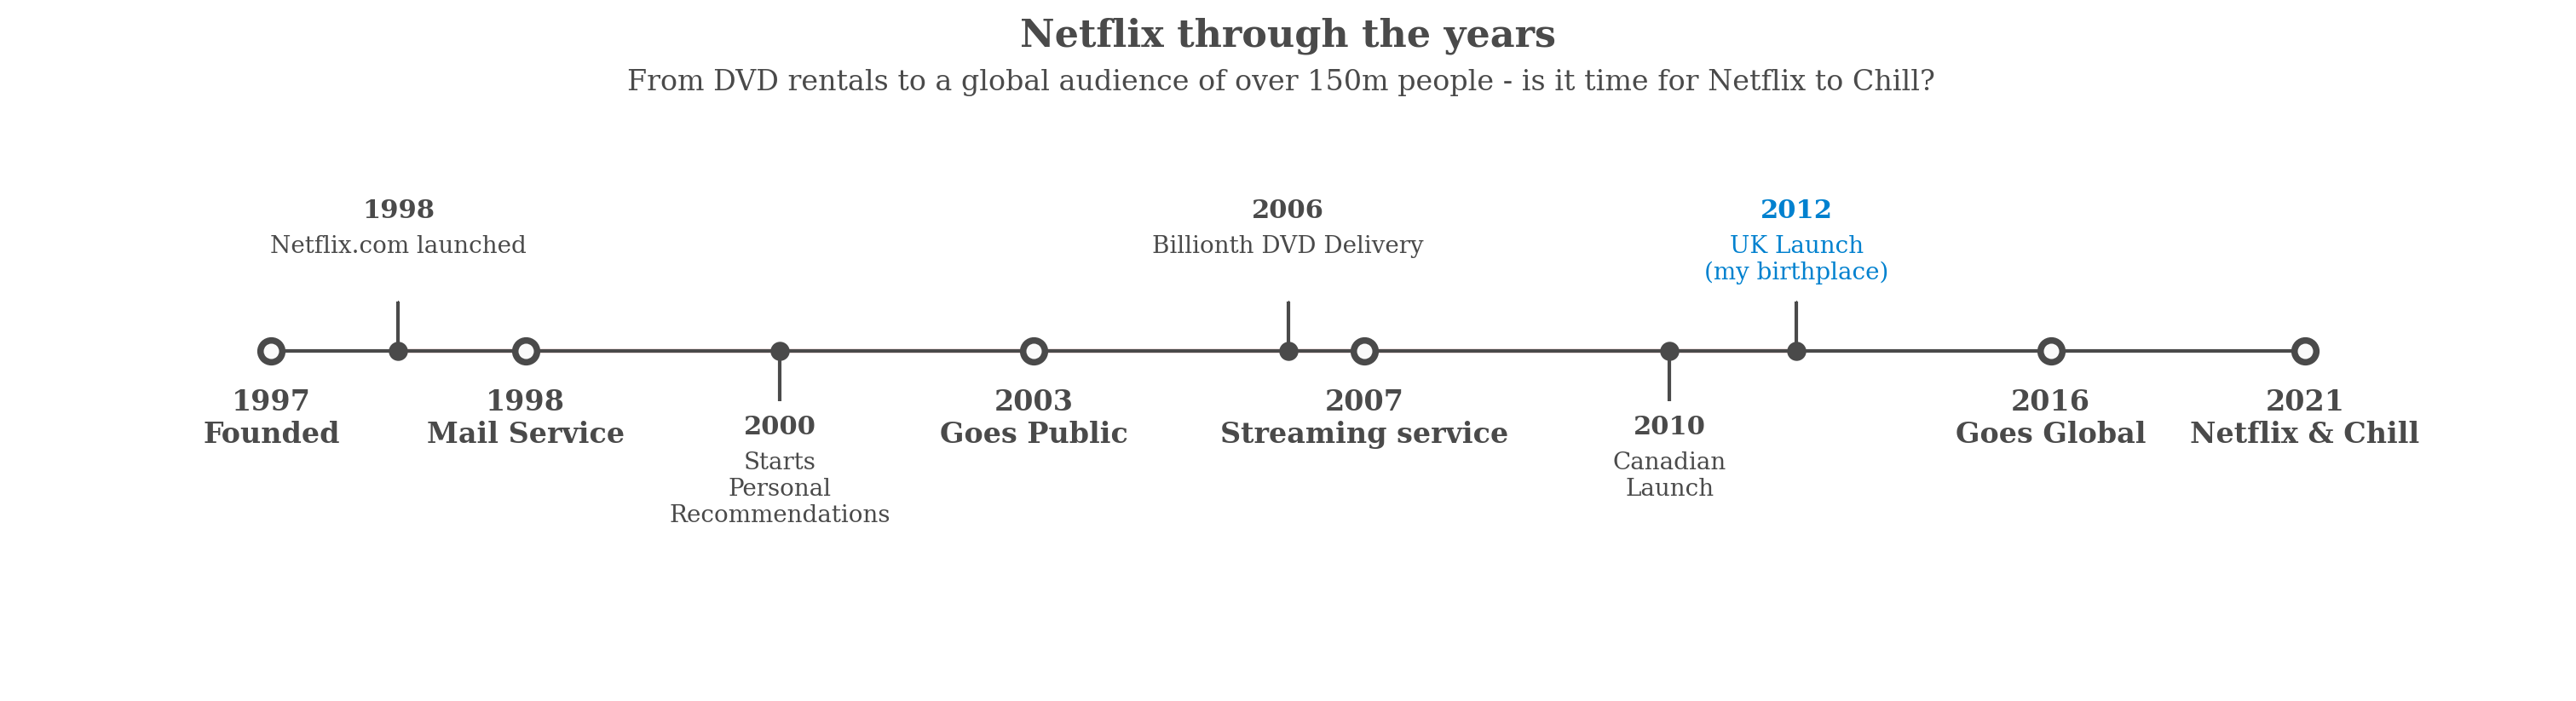

In [234]:
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#0081CF', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#0081CF')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

- ### Type of Media
As you can see in the dataset, There are two types of media: TV Show and Movies.\
Let's make a comparision between these types: The percentage (%) of each type in Netflix

In [235]:
x = df.groupby('type')['type'].count() # count the number of data in each type
y = len(df) # count the total number of data in entire dataset
r = (x/y).round(2)

In [236]:
# convert `Series` into `DataFrame` that help me easy to use further
mf_ratio_1 = pd.DataFrame(r)
mf_ratio_1

,type
type,
Movie,0.7
TV Show,0.3


In [237]:
# As you can see, it's hard to pick out the Movie or TV Show column,
# so I tranpose it into another dataframe
# Because I'll use `mf_ratio['Movie']` or `mf_ratio['TV Show']`
mf_ratio = pd.DataFrame(r).T
mf_ratio

type,Movie,TV Show
type,0.7,0.3


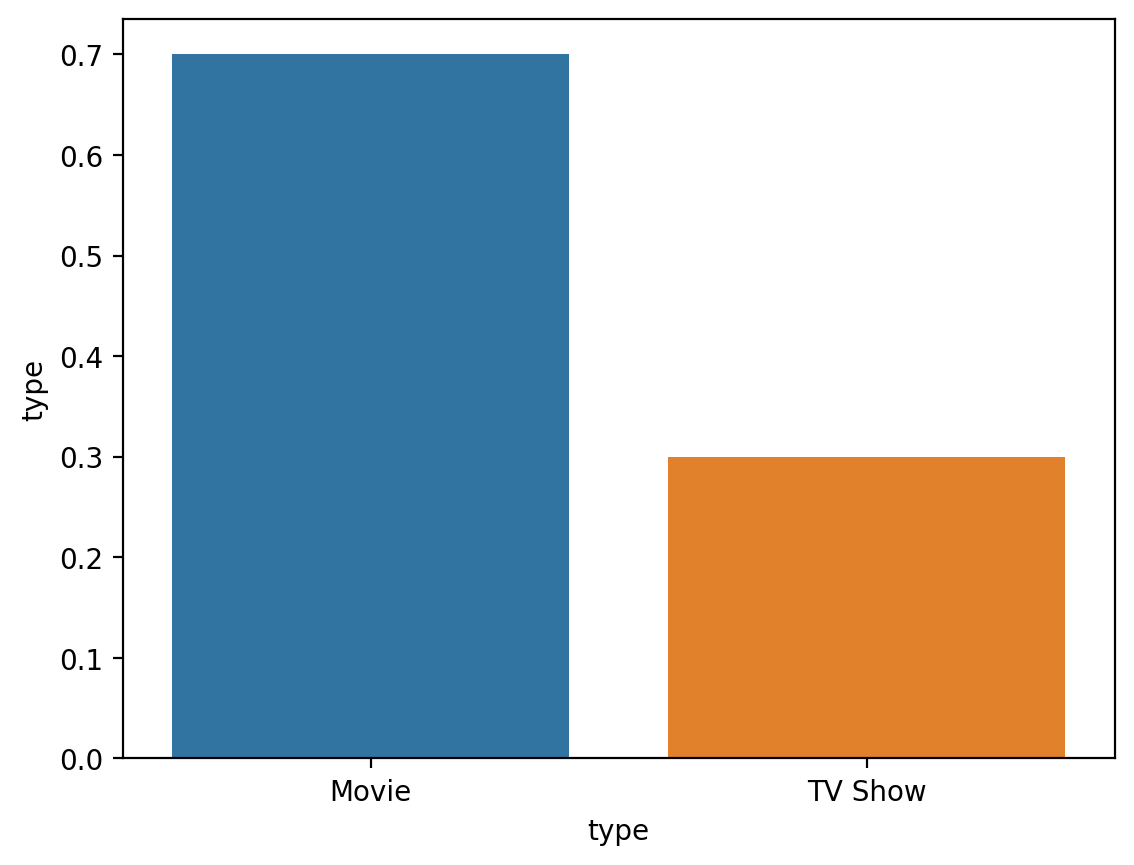

In [238]:
# This is a common way to visualize the percentage of each types
sns.barplot(mf_ratio_1, x = mf_ratio_1.index, y = mf_ratio_1['type'])
plt.show()

[]

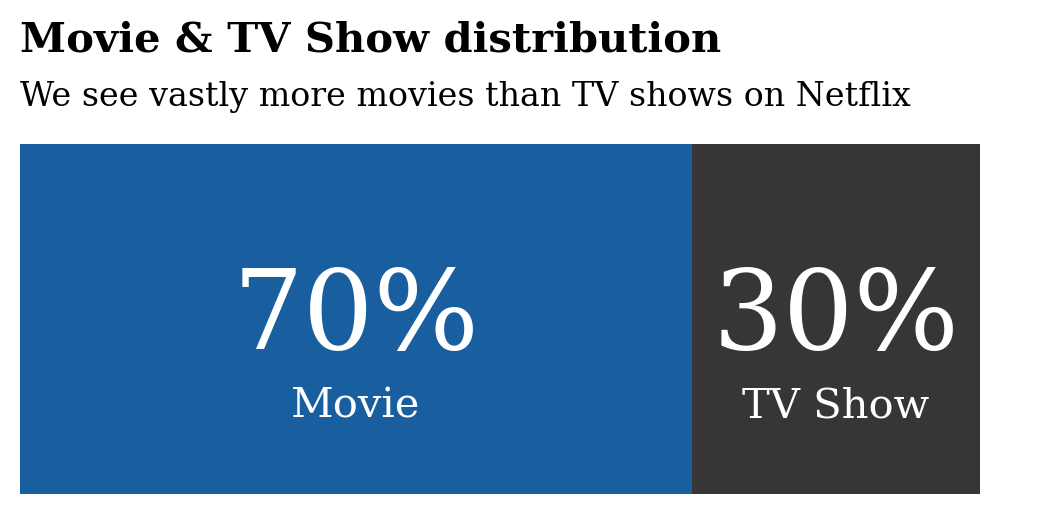

In [239]:
# Let's make it more beautiful
fig, ax = plt.subplots(1, 1, figsize=(6.5,2.5)) # subplots(rows,columns,size(width,height))

ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#004E95',alpha=0.9)

# Create a blue color for Movie, index = type and columns = Movie
ax.barh(mf_ratio.index, mf_ratio['TV Show'],
        color='#221f1f', alpha=0.9, left=mf_ratio['Movie'])

# Create a black color for TV Show, index = type and columns = TV Show

# Now, create the percentage for each type
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", # mf_ratio['Movie'][0] = 0.7
                xy=(mf_ratio['Movie'][i]/2, i), # the location xy(x=0.7/2, y=0.7)
                va = 'center', ha = 'center', fontsize=40,
                fontfamily='serif',fontweight='light',color='white')
    ax.annotate("Movie", xy=(mf_ratio['Movie'][i]/2,-0.20), 
                va = 'center', ha = 'center', fontsize=15,
                fontfamily='serif',fontweight='light',color='white') 

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, 
                   fontweight='light', fontfamily='serif', color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.2),
                   va = 'center', ha='center',fontsize=15,
                   fontweight='light', fontfamily='serif', color='white')
    
# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontsize=15, fontweight='bold',
         fontfamily='serif')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix',
         fontsize=12, fontfamily='serif')

# Remove top, bottom, left, right spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Remove x-ticks, y-ticks
ax.set_xticks([])
ax.set_yticks([])

- ### Countries
As you can see, there are much more movies than TV shows on Netflix.\
Which countries have the most content on Netflix?

In [240]:
# Firstly, let's check country unique value
# Let's retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: first_country, dtype: object

In [241]:
data = df.groupby('first_country')['first_country'].count().sort_values(ascending=False)[:10]
data

first_country
United States     4042
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: first_country, dtype: int64

In [242]:
# Plot
# Create a list of 10 white color
color_map = ['#f5f5f1' for _ in range(10)]
# I want to hightlight 3-first columns by using blue color
color_map[0] = color_map[1] = color_map[2] = '#004E95'

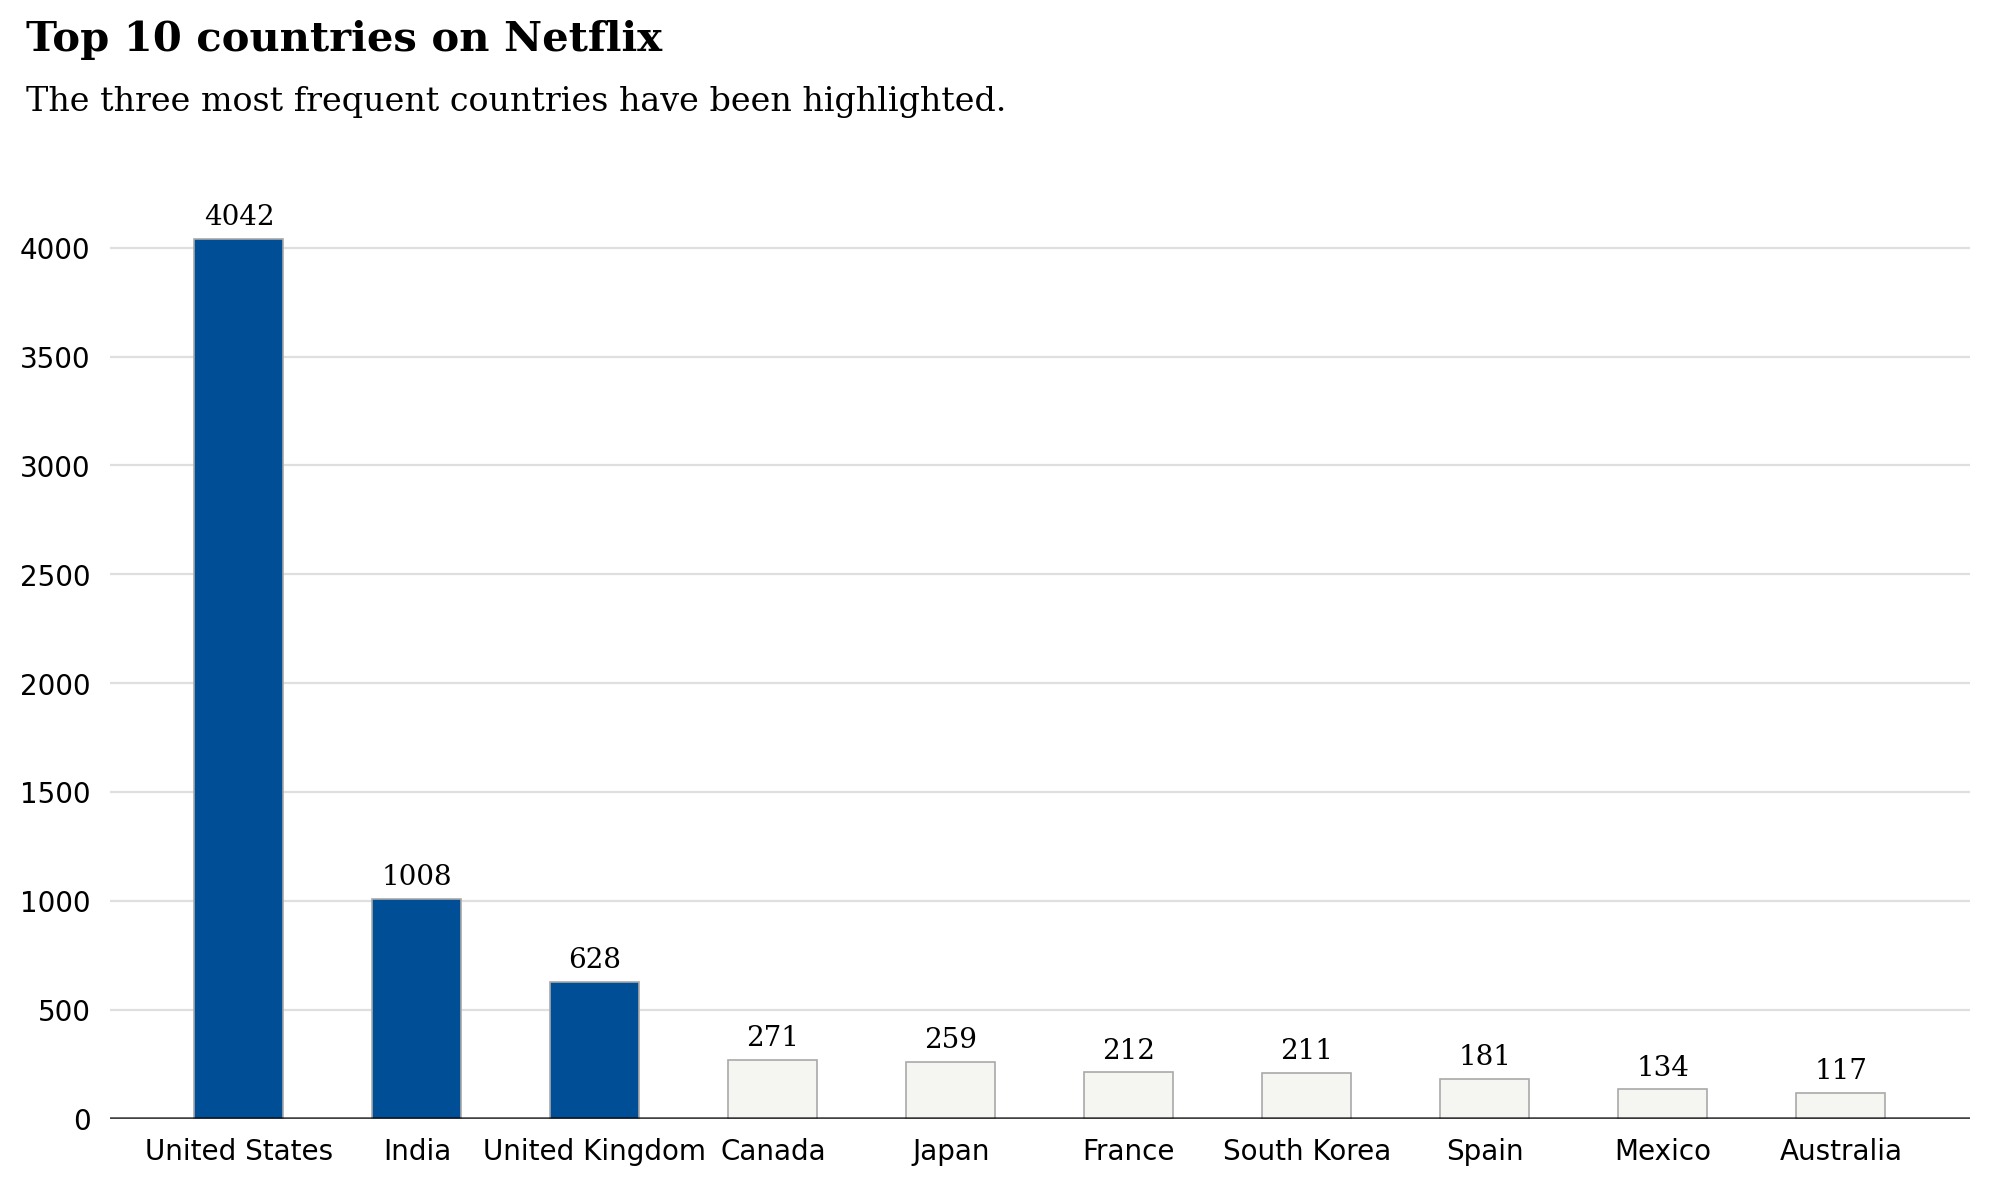

In [243]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(data.index, data, width=0.5, edgecolor='darkgray', linewidth=0.6, color=color_map)

# annotations
# Illustrate the number of content in each country on Netflix
for i in data.index: # i = 0,1,2,3...
    ax.annotate(f"{data[i]}", # data[0] = United States
                xy=(i, data[i] + 100), # xy=(variable 1, value 1)
                va='center',ha='center',fontweight='light',fontfamily='serif')

# Remove top, bottom, left, right spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Remove x-ticks and y-ticks
ax.tick_params(bottom=False)
ax.tick_params(left=False)

# Create a line at x-axis
plt.axhline(y= 0, color='black',linewidth=1.3,alpha=0.7)

# Make a horizontal grid
ax.grid(axis='y',linestyle='-',alpha=0.4)
ax.set_axisbelow(True) # set the grid behind plot

# Title and sub-title
fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.',
        fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

- ### The favorite content in 10 countries
Let's make a plot to illustrate the percentage of two types of media in these 10 countries

In [244]:
data.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object', name='first_country')

In [245]:
data_q2q3 = df[['type','first_country']].groupby('first_country')['type'].value_counts().unstack().loc[data.index]
data_q2q3

type,Movie,TV Show
first_country,,
United States,2804.0,1238.0
India,927.0,81.0
United Kingdom,382.0,246.0
Canada,187.0,84.0
Japan,85.0,174.0
France,148.0,64.0
South Korea,47.0,164.0
Spain,129.0,52.0
Mexico,86.0,48.0


In [246]:
data_q2q3['total'] = data_q2q3.sum(axis=1) # remember to set axis=1 to summarize rows
data_q2q3

type,Movie,TV Show,total
first_country,,,
United States,2804.0,1238.0,4042.0
India,927.0,81.0,1008.0
United Kingdom,382.0,246.0,628.0
Canada,187.0,84.0,271.0
Japan,85.0,174.0,259.0
France,148.0,64.0,212.0
South Korea,47.0,164.0,211.0
Spain,129.0,52.0,181.0
Mexico,86.0,48.0,134.0


In [255]:
data_q2q3_ratio = (data_q2q3.T / data_q2q3['total']).T[['Movie','TV Show']].sort_values(by='Movie',ascending=True)
# You must remember matrics need 1 horizontal and 1 vertical dataframe to calculate
data_q2q3_ratio

type,Movie,TV Show
first_country,,
South Korea,0.222749,0.777251
Japan,0.328185,0.671815
Australia,0.521368,0.478632
United Kingdom,0.608280,0.391720
Mexico,0.641791,0.358209
Canada,0.690037,0.309963
United States,0.693716,0.306284
France,0.698113,0.301887
Spain,0.712707,0.287293


In [248]:
data_q2q3.T

first_country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
type,,,,,,,,,,
Movie,2804.0,927.0,382.0,187.0,85.0,148.0,47.0,129.0,86.0,61.0
TV Show,1238.0,81.0,246.0,84.0,174.0,64.0,164.0,52.0,48.0,56.0
total,4042.0,1008.0,628.0,271.0,259.0,212.0,211.0,181.0,134.0,117.0


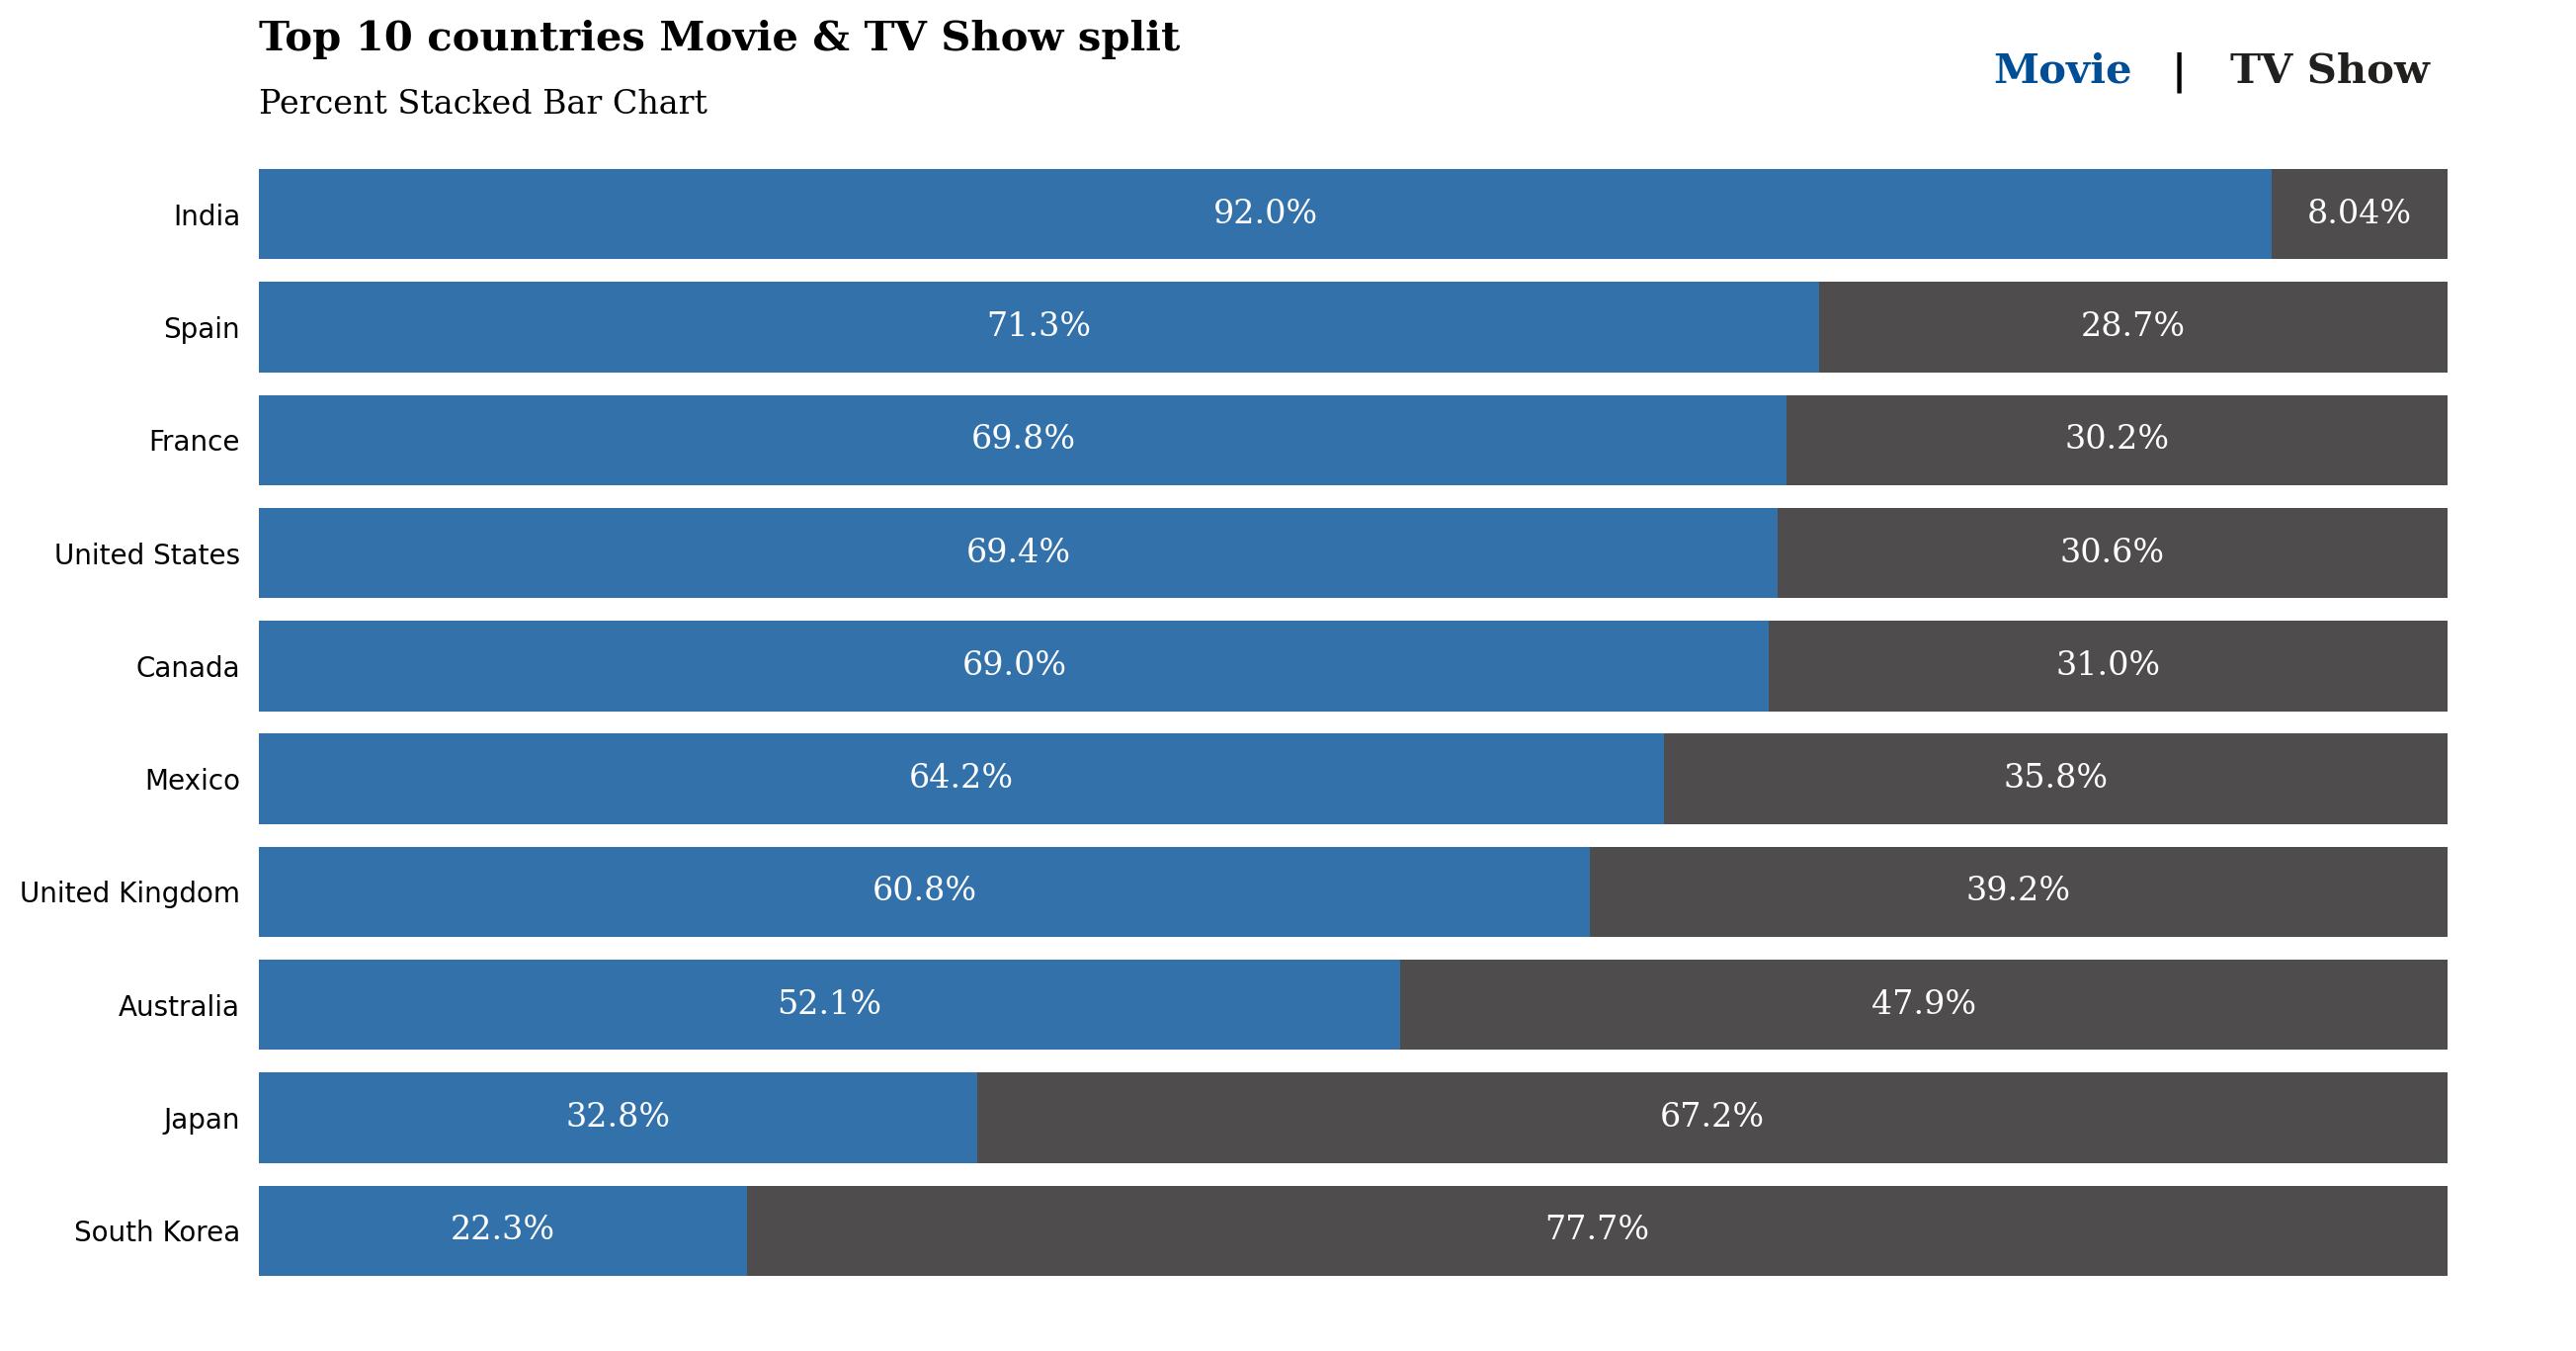

In [292]:
# Create plot
fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], color='#004E95',
        alpha=0.8)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], 
        left=data_q2q3_ratio['Movie'],color='#221f1f', alpha=0.8)

# Illustrate the percentage of each country
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

# Remove top, bottom, left, right spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Remove x-ticks and y-ticks
ax.tick_params(bottom=False)
ax.tick_params(left=False)

# Remove x-axis
ax.set_xticks([])

fig.text(0.125, 0.92, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.125, 0.88, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif') 

fig.text(0.71,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#004E95')
fig.text(0.77,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.79,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

In [298]:
df[['rating','type']].groupby('rating')['type'].value_counts().sort_values(ascending=False).unstack()[:10]

type,Movie,TV Show
rating,,
66 min,1.0,NaN
74 min,1.0,NaN
84 min,1.0,NaN
G,41.0,NaN
NC-17,3.0,NaN
NR,75.0,5.0
PG,287.0,NaN
PG-13,490.0,NaN
R,797.0,2.0


- ### How has content been added over the years?
Let's see how Netflix's content had been added over years

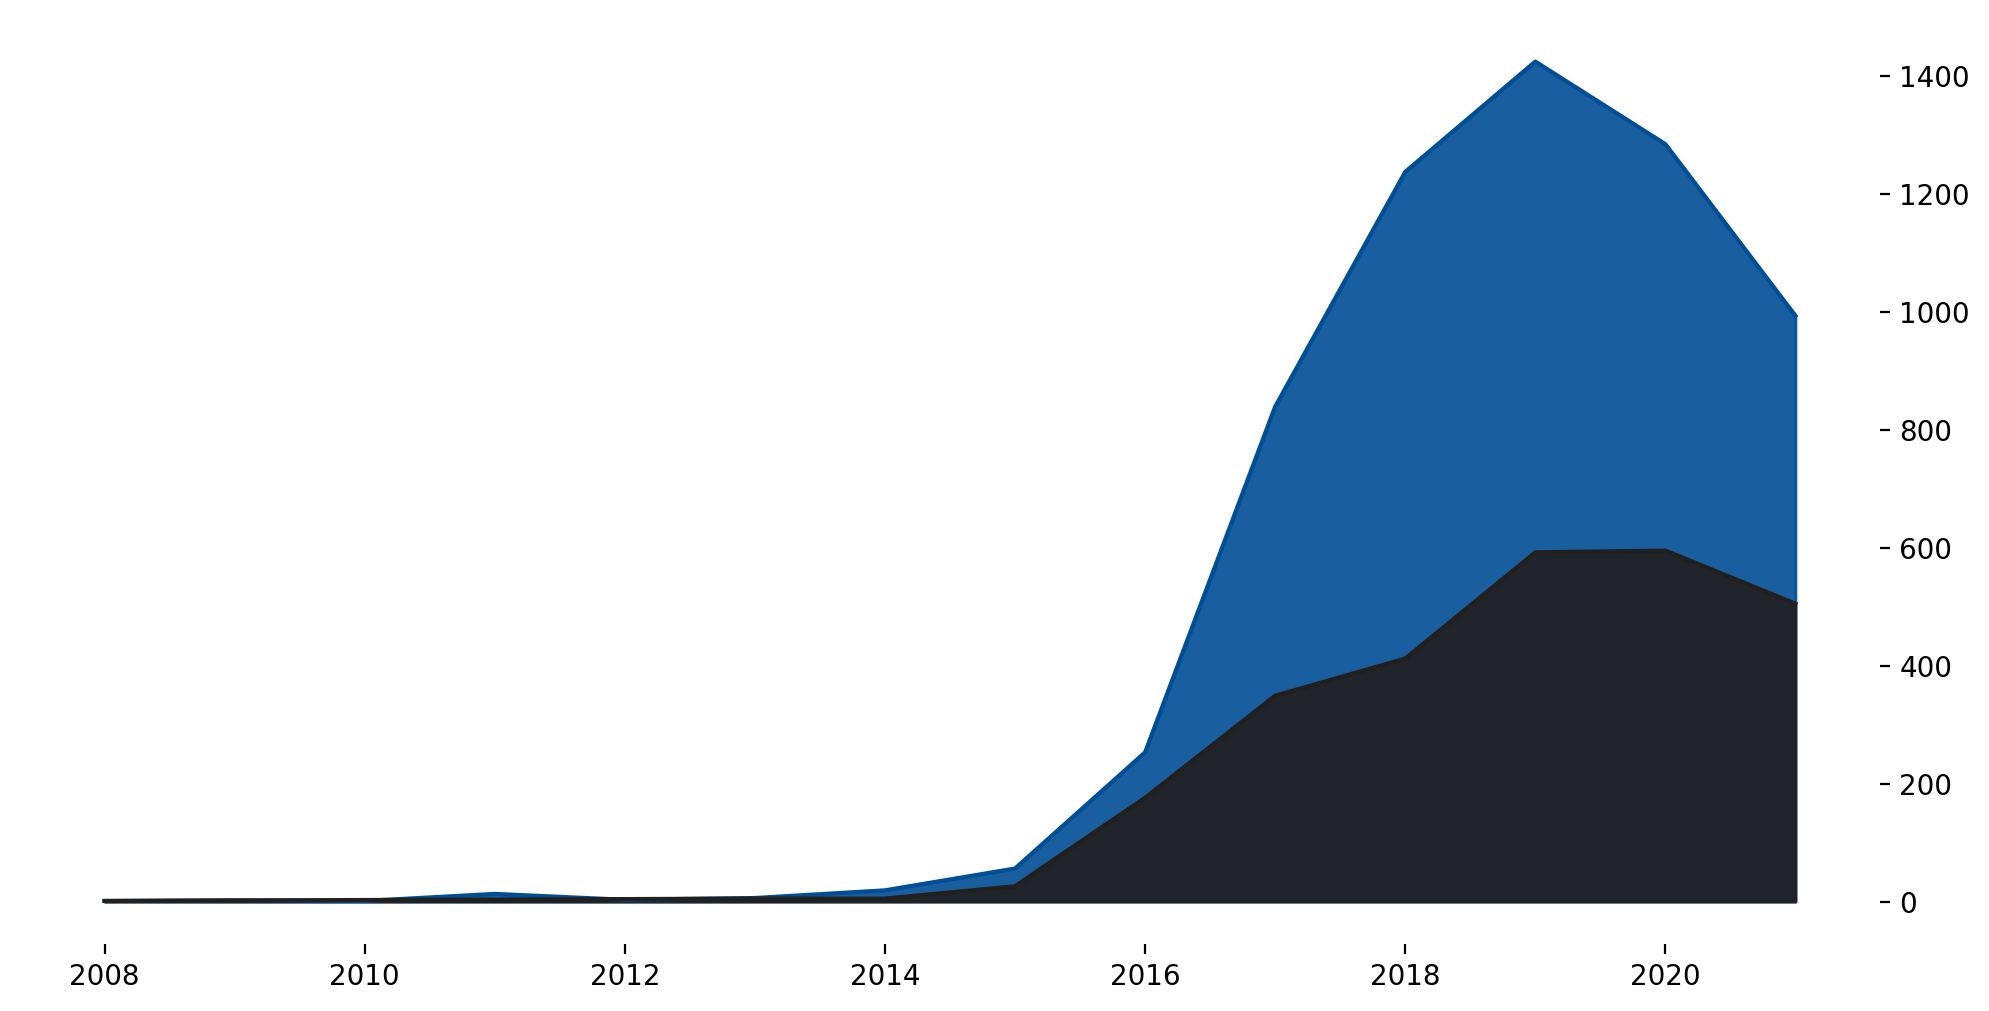

In [317]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
color = ['#004E95','#221f1f']

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i])
    ax.fill_between(mtv_rel.index,0, mtv_rel, color=color[i],alpha=0.9)

ax.yaxis.tick_right() # transfer y-axis from left to right

# Remove top, bottom, left, right spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

In [311]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

In [307]:
mtv_rel

2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
Name: year_added, dtype: int64